##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [9]:
!pip install -q mediapipe


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [4]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [24]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

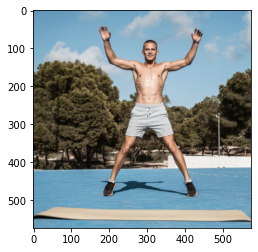

In [11]:
!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./jj.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


I0000 00:00:1742372165.301021 2651341 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1742372165.321338 2653117 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.54.15), renderer: NVIDIA RTX A4000/PCIe/SSE2


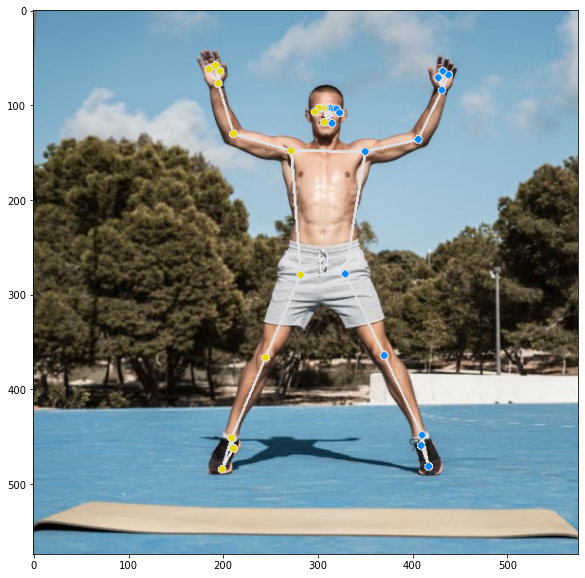

In [19]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("./jj.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)[...,::-1])
plt.show()

33
PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5423144698143005, y=0.1922430396080017, z=-0.6005429625511169, visibility=0.9999792575836182, presence=0.999984622001648), NormalizedLandmark(x=0.5464661717414856, y=0.1811530888080597, z=-0.570692241191864, visibility=0.9999138116836548, presence=0.99997878074646), NormalizedLandmark(x=0.5515324473381042, y=0.18142029643058777, z=-0.571165144443512, visibility=0.999915361404419, presence=0.9999798536300659), NormalizedLandmark(x=0.556828498840332, y=0.1817966103553772, z=-0.5710400938987732, visibility=0.9999175071716309, presence=0.9999724626541138), NormalizedLandmark(x=0.5350248217582703, y=0.18068000674247742, z=-0.5696197152137756, visibility=0.9999334812164307, presence=0.9999712705612183), NormalizedLandmark(x=0.5297236442565918, y=0.1806069314479828, z=-0.5701106190681458, visibility=0.9999451637268066, presence=0.9999734163284302), NormalizedLandmark(x=0.5249840021133423, y=0.18082773685455322, z=-0.5703567266464

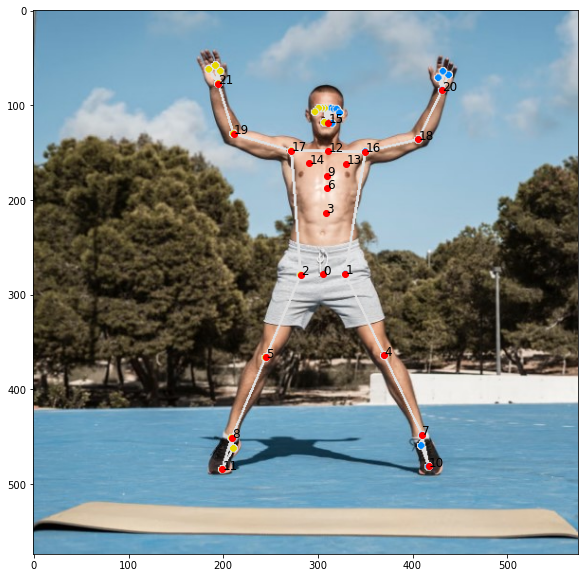

SMPL POSE:  [[305.5, 278.5], [329.0, 278.0], [282.0, 279.0], [308.25, 213.5], [370.0, 364.0], [245.0, 366.0], [309.34999999999997, 187.5], [410.0, 448.0], [209.0, 451.0], [309.90000000000003, 174.5], [417.0, 481.0], [199.0, 484.0], [311.0, 148.5], [329.95000000000005, 161.75], [290.95000000000005, 161.25], [311.0, 118.5], [350.0, 149.0], [272.0, 148.0], [406.0, 136.0], [211.0, 130.0], [431.0, 84.0], [195.0, 77.0]]


In [33]:
print(len(detection_result.pose_landmarks[0]))
print(detection_result)
pose = detection_result.pose_landmarks[0]
pose_px = []
print(annotated_image.shape)
for pose_landmark in pose:
    landmark_px = solutions.drawing_utils._normalized_to_pixel_coordinates(pose_landmark.x, pose_landmark.y,
                                                                        annotated_image.shape[1],
                                                                        annotated_image.shape[0])
    pose_px.append(landmark_px)
# SMPL pose convention
pose_px = np.array(pose_px)
smpl_pose = [
    (pose_px[23] + pose_px[24])/2, # 0:pelvis
    pose_px[23], # 1:left hip
    pose_px[24], # 2:right hip
    ((pose_px[23] + pose_px[24])/2 + (pose_px[11] + pose_px[12])/2) * 0.5, # 3:spine
    pose_px[25], # 4:left knee
    pose_px[26], # 5:right knee
    ((pose_px[23] + pose_px[24])/2) * 0.3 + ((pose_px[11] + pose_px[12])/2) * 0.7,  # 6:torso
    pose_px[27], # 7:left ankle
    pose_px[28], # 8:right ankle
    ((pose_px[23] + pose_px[24])/2) * 0.2 + ((pose_px[11] + pose_px[12])/2) * 0.8,  # 9:chest
    pose_px[31], # 10:left foot
    pose_px[32], # 11:right foot
    (pose_px[11] + pose_px[12])/2, # 12:neck
    ((((pose_px[23] + pose_px[24])/2) * 0.2 + ((pose_px[11] + pose_px[12])/2) * 0.8) + pose_px[11])/2, # 13:left collar
    ((((pose_px[23] + pose_px[24])/2) * 0.2 + ((pose_px[11] + pose_px[12])/2) * 0.8) + pose_px[12])/2, # 14:right collar
    (pose_px[9] + pose_px[10])/2, # 15:head
    pose_px[11], # 16:left shoulder
    pose_px[12], # 17:right shoulder
    pose_px[13], # 18:left elbow
    pose_px[14], # 19:right elbow
    pose_px[15], # 20:left wrist
    pose_px[16], # 21:right wrist
]
# Plot the SMPL pose
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)[...,::-1])
for i in range(len(smpl_pose)):
    plt.scatter(smpl_pose[i][0], smpl_pose[i][1], c='r')
    plt.text(smpl_pose[i][0], smpl_pose[i][1], str(i), fontsize=12)
plt.show()

print("SMPL POSE: ", np.stack(smpl_pose).tolist())


Visualize the pose segmentation mask.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


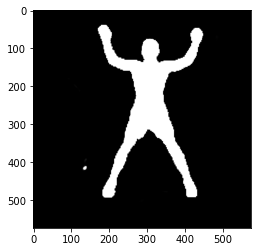

In [14]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
plt.imshow(visualized_mask)
plt.show()